In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [33]:
df = pd.read_csv("Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [34]:
df.shape

(10000, 14)

In [35]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [36]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

In [37]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [38]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [39]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [40]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

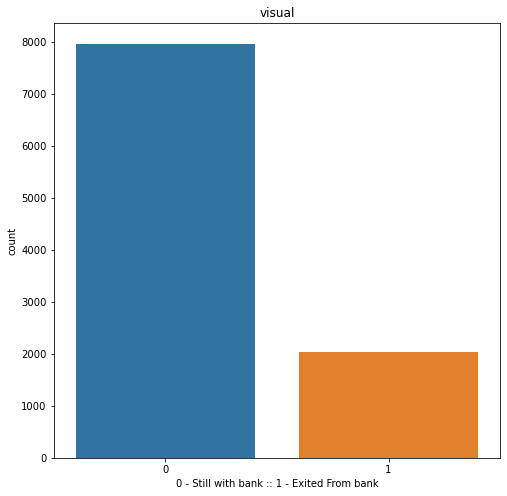

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited',data=df)
plt.xlabel("0 - Still with bank :: 1 - Exited From bank")
plt.ylabel("count")
plt.title("visual")
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [44]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
df1=df.copy()

In [46]:
df1.shape

(10000, 14)

In [47]:
updated_df=df.dropna(axis=1)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
updated_df['Balance']=updated_df['Balance'].fillna(updated_df['Balance'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


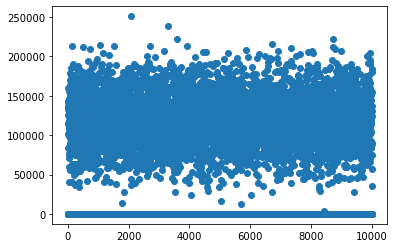

In [49]:
plt.scatter(df.index,df['Balance'])
plt.show()


<AxesSubplot:ylabel='Balance'>

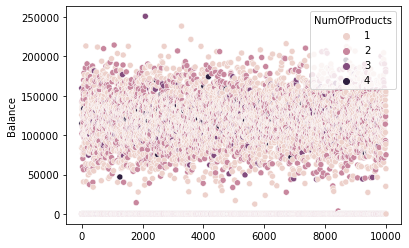

In [50]:
sns.scatterplot(x=df.index,y=df['Balance'],hue=df['NumOfProducts'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

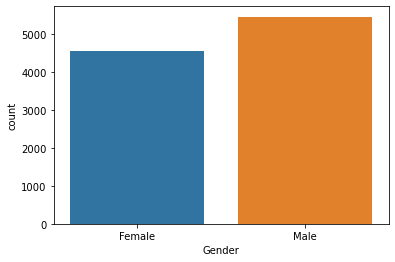

In [51]:
sns.barplot(x='Gender',y='Exited',data=df)
sns.countplot(x='Gender',data=df)

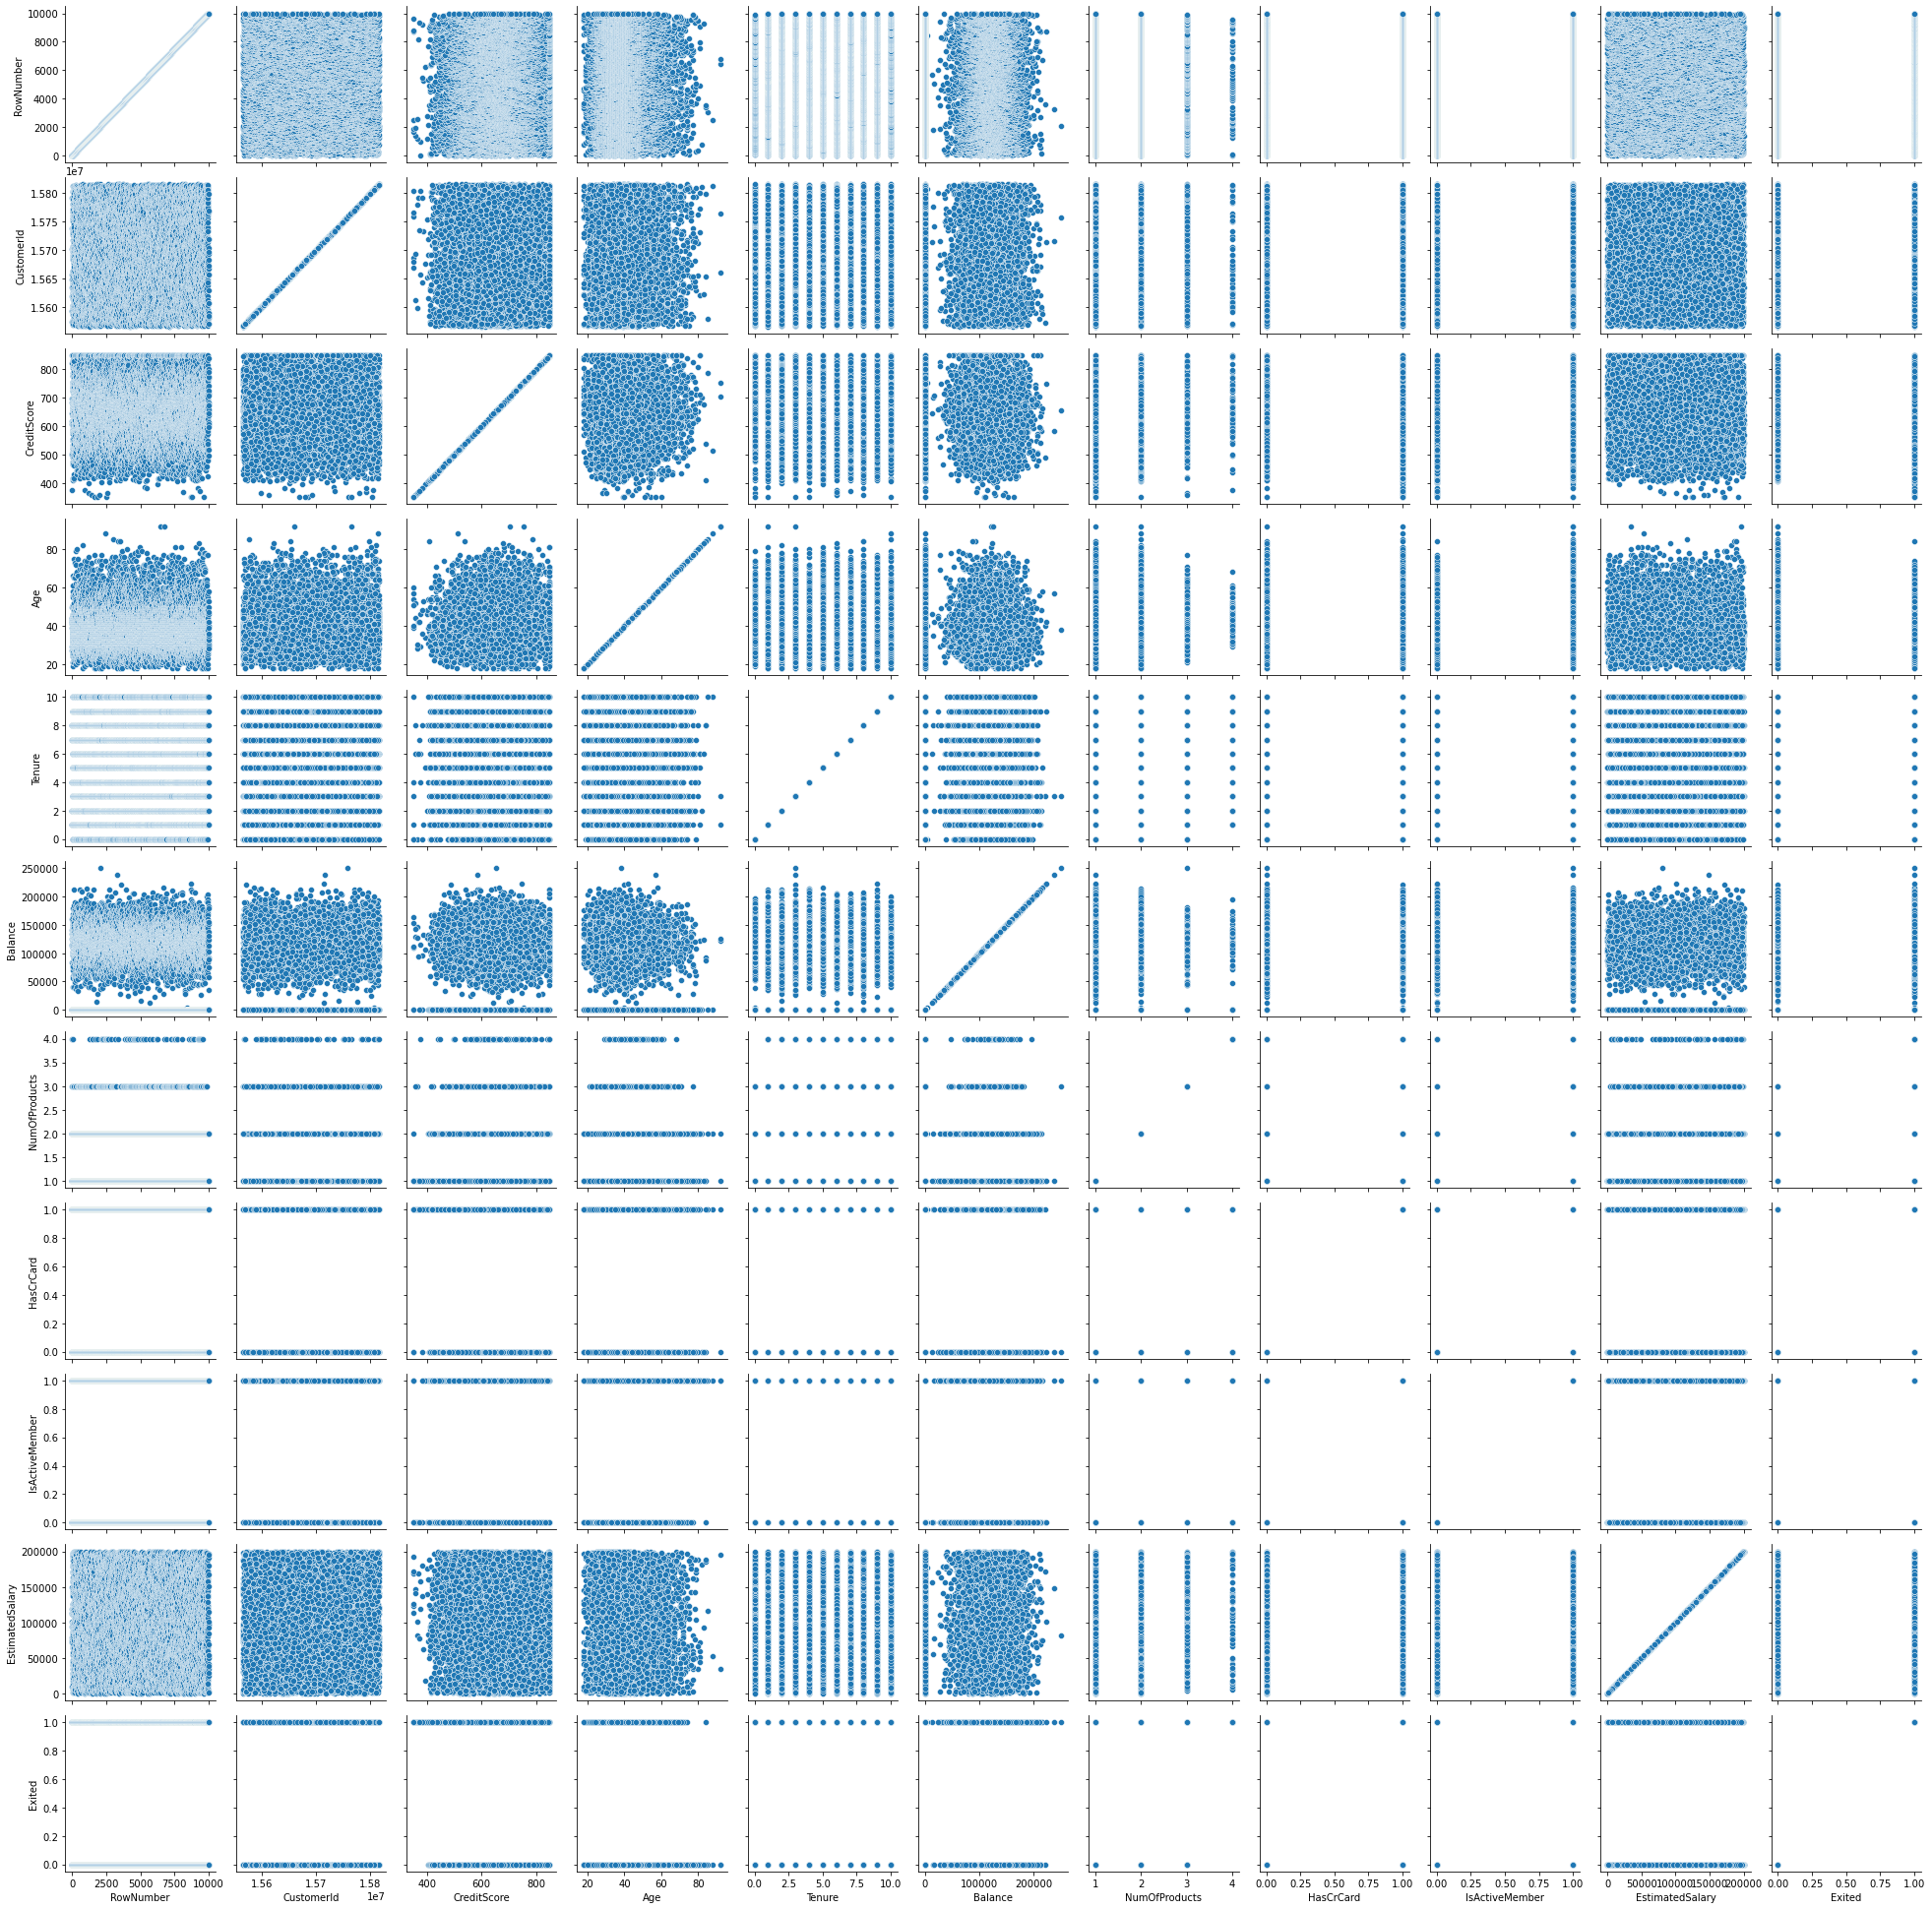

In [52]:
g=sns.PairGrid(df)
g.map(sns.scatterplot)

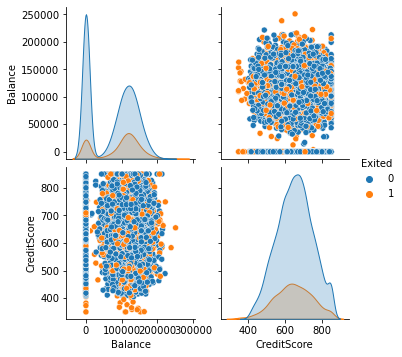

In [53]:
sns.pairplot(data=df[['Balance','CreditScore','Exited']],hue='Exited')


In [54]:
df.describe(include='all')

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary        Exited  
count     10000.000000     10000.000000  10000.000000  
unique             NaN              NaN           NaN  
top                NaN              NaN           NaN  
freq               NaN              NaN           NaN  
mean          0.515100    100090.239881      0.203700  
std           0.499797     57510.492818      0.402769  
min           0.000000        11.580000      0.000000  
25%           0.000000     51002.110000      0.000000  
50%           1.000000    100193.915000      0.000000  
75%           1.000000    149388.247500      0.000000  
max           1.000000    199992.480000      1.000000

In [55]:
df[(df['NumOfProducts']>2) | (df['NumOfProducts']<3)]


RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [56]:
df[(df['NumOfProducts']>2)]

RowNumber  CustomerId        Surname  CreditScore Geography  Gender  \
2             3    15619304           Onio          502    France  Female   
7             8    15656148         Obinna          376   Germany  Female   
30           31    15589475        Azikiwe          591     Spain  Female   
70           71    15703793     Konovalova          738   Germany    Male   
88           89    15622897         Sharpe          646    France  Female   
...         ...         ...            ...          ...       ...     ...   
9737       9738    15741197        Calzada          710     Spain    Male   
9747       9748    15775761  Iweobiegbunam          610   Germany  Female   
9800       9801    15640507             Li          762     Spain  Female   
9877       9878    15572182     Onwuamaeze          505   Germany  Female   
9895       9896    15796764          Bruno          684   Germany  Female   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
2      42       8  159660.80              3          1               0   
7      29       4  115046.74              4          1               0   
30     39       3       0.00              3          1               0   
70     58       2  133745.44              4          1               0   
88     46       4       0.00              3          1               0   
...   ...     ...        ...            ...        ...             ...   
9737   22       8       0.00              3          1               0   
9747   69       5   86038.21              3          0               0   
9800   35       3  119349.69              3          1               1   
9877   33       3  106506.77              3          1               0   
9895   56       3  127585.98              3          1               1   

      EstimatedSalary  Exited  
2           113931.57       1  
7           119346.88       1  
30          140469.38       1  
70           28373.86       1  
88           93251.42       1  
...               ...     ...  
9737        107292.91       0  
9747        192743.06       1  
9800         47114.18       1  
9877         45445.78       1  
9895         80593.49       1  

[326 rows x 14 columns]

In [57]:
df['Age']=df['Age'].astype('float')
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [58]:
pd.get_dummies(df,columns=['Tenure']).head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

     Balance  NumOfProducts  HasCrCard  ...  Tenure_1  Tenure_2  Tenure_3  \
0       0.00              1          1  ...         0         1         0   
1   83807.86              1          0  ...         1         0         0   
2  159660.80              3          1  ...         0         0         0   
3       0.00              2          0  ...         1         0         0   
4  125510.82              1          1  ...         0         1         0   

   Tenure_4  Tenure_5  Tenure_6  Tenure_7  Tenure_8  Tenure_9  Tenure_10  
0         0         0         0         0         0         0          0  
1         0         0         0         0         0         0          0  
2         0         0         0         0         1         0          0  
3         0         0         0         0         0         0          0  
4         0         0         0         0         0         0          0  

[5 rows x 24 columns]

In [59]:
x=df.iloc[:,:-1].values
y=df.iloc[:,4].values
print(x,y)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]] ['France' 'Spain' 'France' ... 'France' 'Germany' 'France']


In [60]:
x=df.iloc[1:3,:-1].values
x

array([[2, 15647311, 'Hill', 608, 'Spain', 'Female', 41.0, 1, 83807.86,
        1, 0, 1, 112542.58],
       [3, 15619304, 'Onio', 502, 'France', 'Female', 42.0, 8, 159660.8,
        3, 1, 0, 113931.57]], dtype=object)

In [61]:
x=df[['Gender','Age']]
print(x)

      Gender   Age
0     Female  42.0
1     Female  41.0
2     Female  42.0
3     Female  39.0
4     Female  43.0
...      ...   ...
9995    Male  39.0
9996    Male  35.0
9997  Female  36.0
9998    Male  42.0
9999  Female  28.0

[10000 rows x 2 columns]


In [62]:
training_data,testing_data=train_test_split(df,test_size=1,random_state=3)
print(training_data,testing_data)

      RowNumber  CustomerId          Surname  CreditScore Geography  Gender  \
6555       6556    15581505            Bales          641    France    Male   
1448       1449    15585367           Diribe          555   Germany  Female   
3351       3352    15792729          Holland          474   Germany  Female   
231         232    15627000          Freeman          610    France    Male   
1204       1205    15650098         Baranova          630    France  Female   
...         ...         ...              ...          ...       ...     ...   
6400       6401    15585907          Collier          676     Spain  Female   
9160       9161    15753679  Mullawirraburka          778    France    Male   
9859       9860    15615430            Adams          678   Germany    Male   
1688       1689    15804610           Valdez          601    France  Female   
5994       5995    15746065          Lo Duca          580   Germany    Male   

       Age  Tenure    Balance  NumOfProducts  HasCr